<a href="https://colab.research.google.com/github/KirteshVerma/Cardiovascular_Risk_Prediction/blob/main/kirtesh_Cardio_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cardiovascular Risk Prediction (classification Project)**

## **INTRODUCTION**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. 

It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.


Data Description


Demographic:
• Sex: male or female("M" or "F")


• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral


• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")


• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)


Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# Team Members Contribution

**By Kirtesh Verma:**
1. Data understanding
2. Handling null or missing values
3. Performing EDA
4. Removing Outliers
5. Logistic Regression
6. Support Vector Machine
7. Hyperparameter Tuning on SVM
-----------------------------------------

**By Pravin Bejjo:**
1. Data understanding
2. Data visualization
3. Multivariate analysis
4. Handle Imbalanced Data using SMOTE Technique
5. Random Forest
6. XGBoost Classifier
7. XGBoost(Feature Importance)
------------------------------------------

**By Sahil Pardeshi:**
1. Data understanding
2. Data visualization
3. Bivariate analysis
4. Decision Tree Classifier
5. K-Nearest Neighbour Classifier
6. Hyperparameter Tuning on KNN

In [1]:
#importing the required liabraries for importing and reading data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = ('/content/drive/MyDrive/Capstone_Project_03/data_cardiovascular_risk.csv')

In [4]:
#reading csv file
df = pd.read_csv(path)

In [5]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [8]:
# checking null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
#checking duplicated values
duplicated_values = len(df[df.duplicated()])
f'The number of duplicated values are = {duplicated_values}'

'The number of duplicated values are = 0'

In [10]:
df.drop(['id'],axis = 1, inplace = True) #dropping the id column as it want be needed in the model prediction

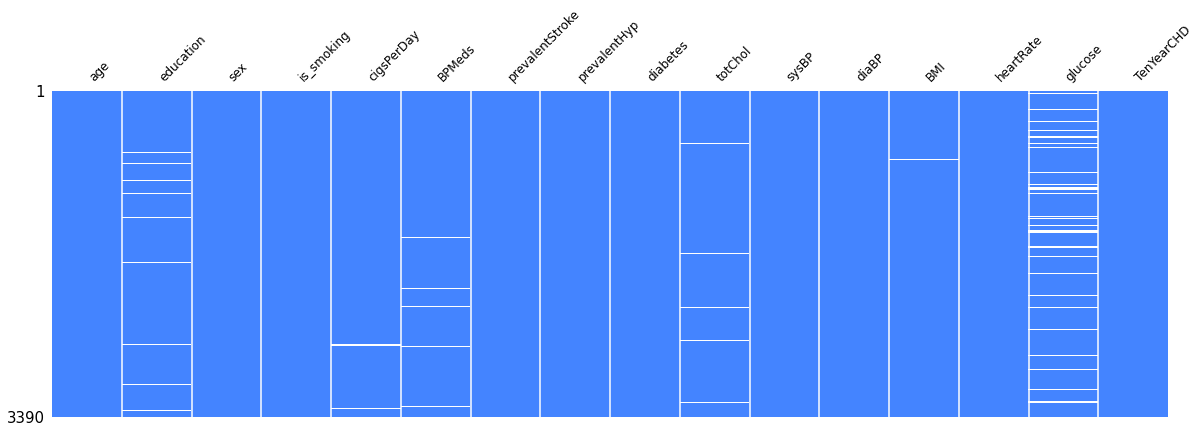

In [11]:
# visualizing null values
import missingno as mn
mn.matrix(df, sparkline=False, figsize=(20,6), fontsize=12, color=(0.27, 0.52, 1.0))


In [12]:
# filling the null values with median and mode for numeric and categorical columns respectively
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace = True)
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

## Label Encoding

In [13]:
# One Hot Encoding 

df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [14]:
# creating a list that contains all the numerical features
numerical_columns  = [i for i in df.columns if len(df[i].unique())>25]
print(list(numerical_columns))

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [15]:
# creating a list that contains all the categorical features
categorical_columns = [i for i in df.columns if len(df[i].unique())<10]

categorical_columns.remove('TenYearCHD') # dropping the target variable i.e. TenYearCHD
print(list(categorical_columns))

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


## Overview of Outliers

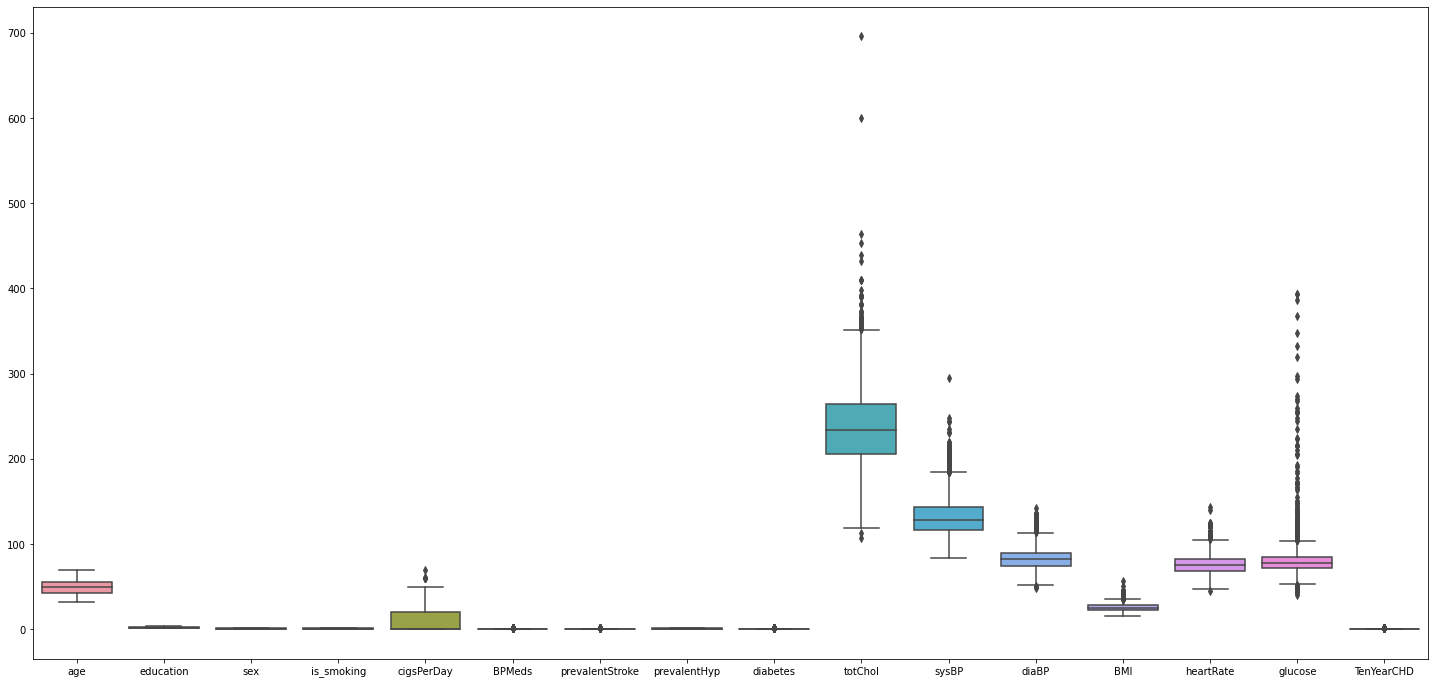

In [16]:
# checking the outliers
plt.figure(figsize= (25,12))
sns.boxplot(data = df)

Outliers can be seen in both the categorical and numerical columns

outliers are present in totChol, cigsPerDay, diaBP,sysBP,hearRate,glucose.

Glucose feature has highest number of outliers.

We cannot just remove the oultiers as it will lead to loss of information.

In [17]:
# looking at the unique values of each column in categorical columns
for feature in categorical_columns:
    print(feature,':')
    print(df[feature].value_counts())
    print("----------------")


education :
1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
----------------
sex :
0    1923
1    1467
Name: sex, dtype: int64
----------------
is_smoking :
0    1703
1    1687
Name: is_smoking, dtype: int64
----------------
BPMeds :
0.0    3290
1.0     100
Name: BPMeds, dtype: int64
----------------
prevalentStroke :
0    3368
1      22
Name: prevalentStroke, dtype: int64
----------------
prevalentHyp :
0    2321
1    1069
Name: prevalentHyp, dtype: int64
----------------
diabetes :
0    3303
1      87
Name: diabetes, dtype: int64
----------------


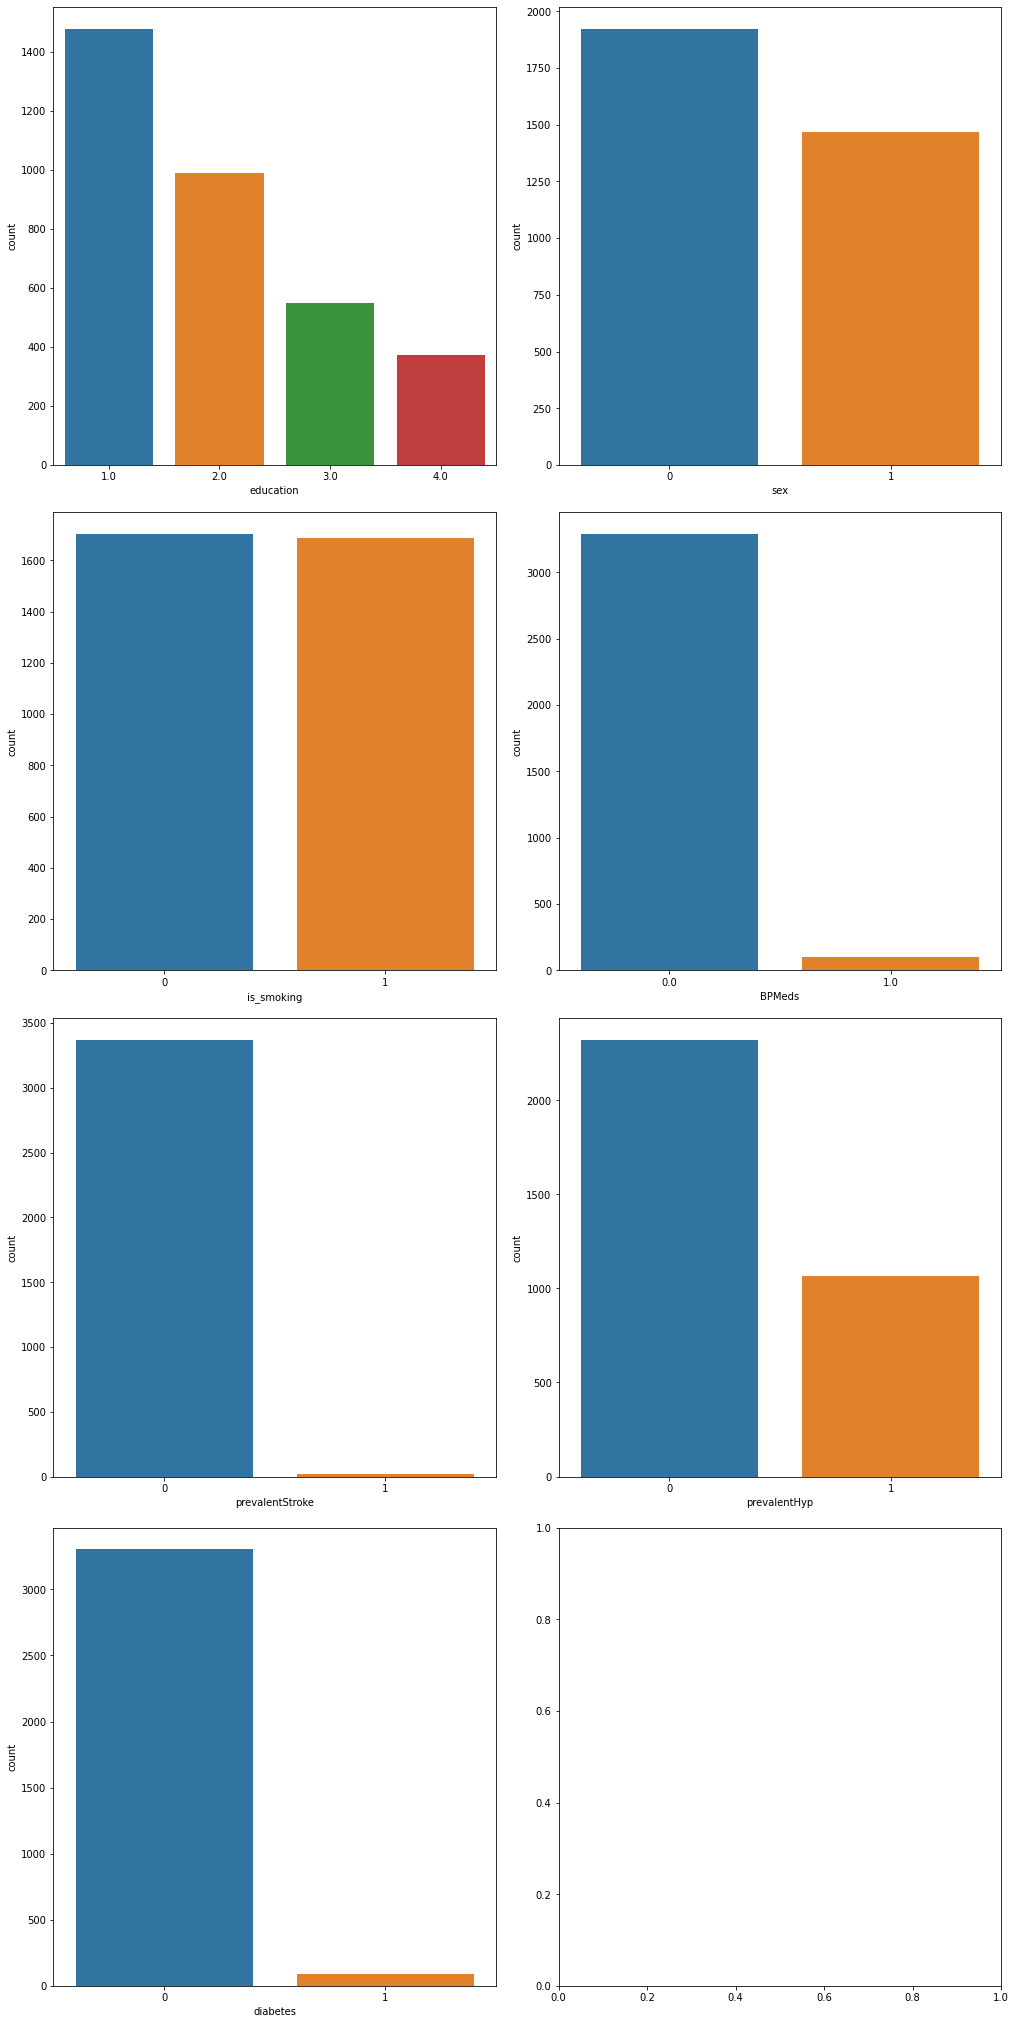

In [18]:
#plotting countplot for categorical columns
num_plots = len(categorical_columns)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_columns):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

**Number of people who were not on BPmeds, who did not had a stroke in past, and who are dont have diastolic blood pressure are very less.**

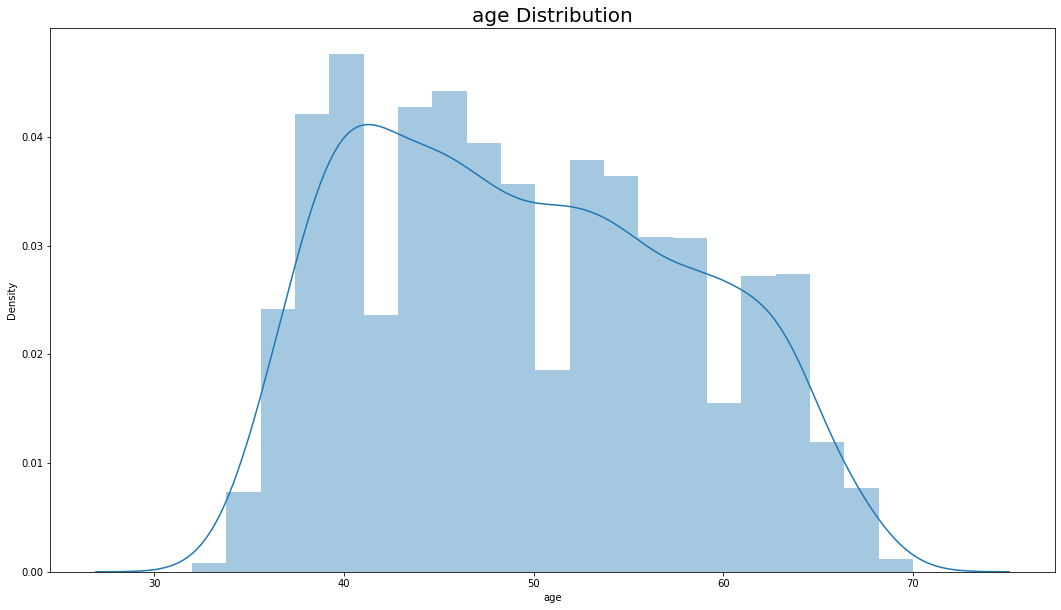

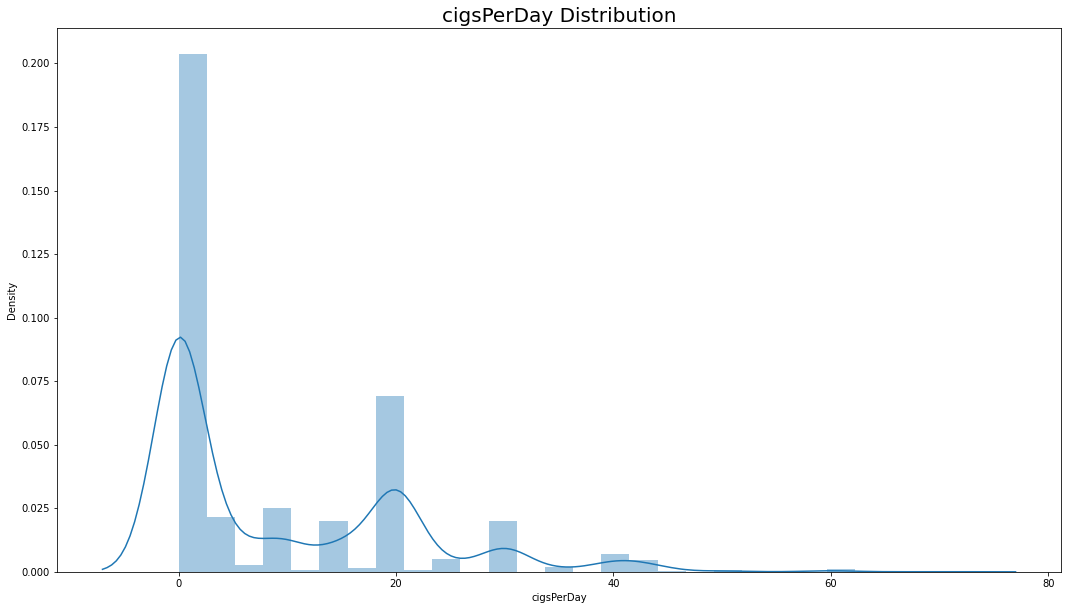

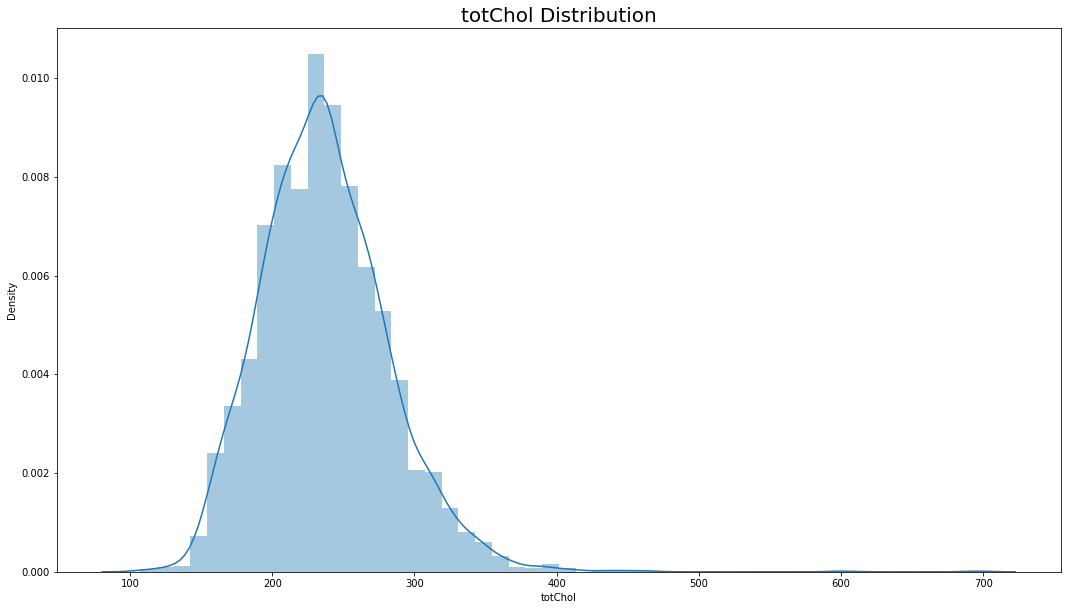

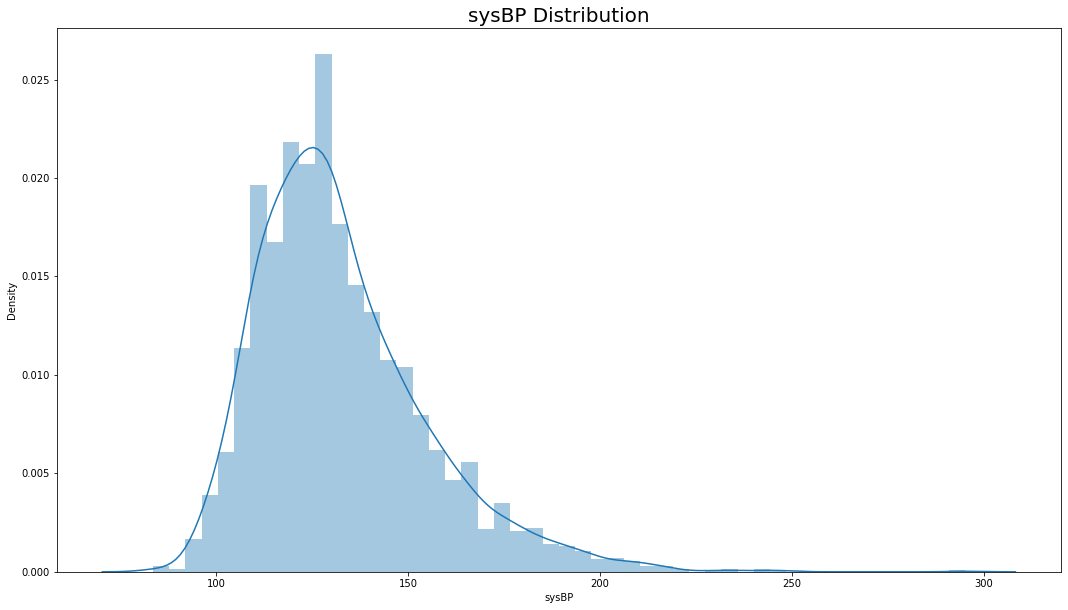

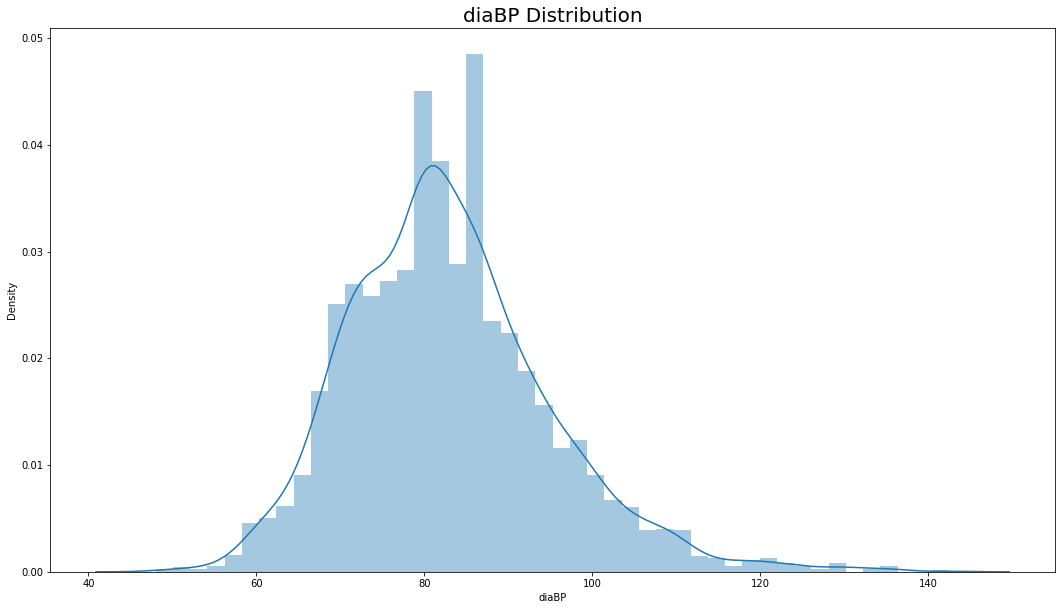

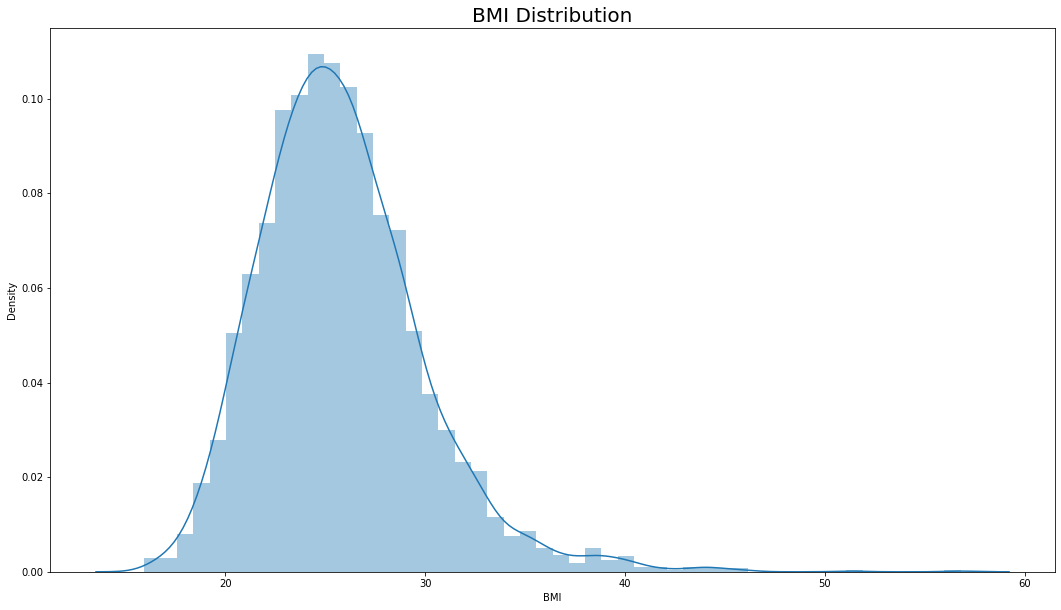

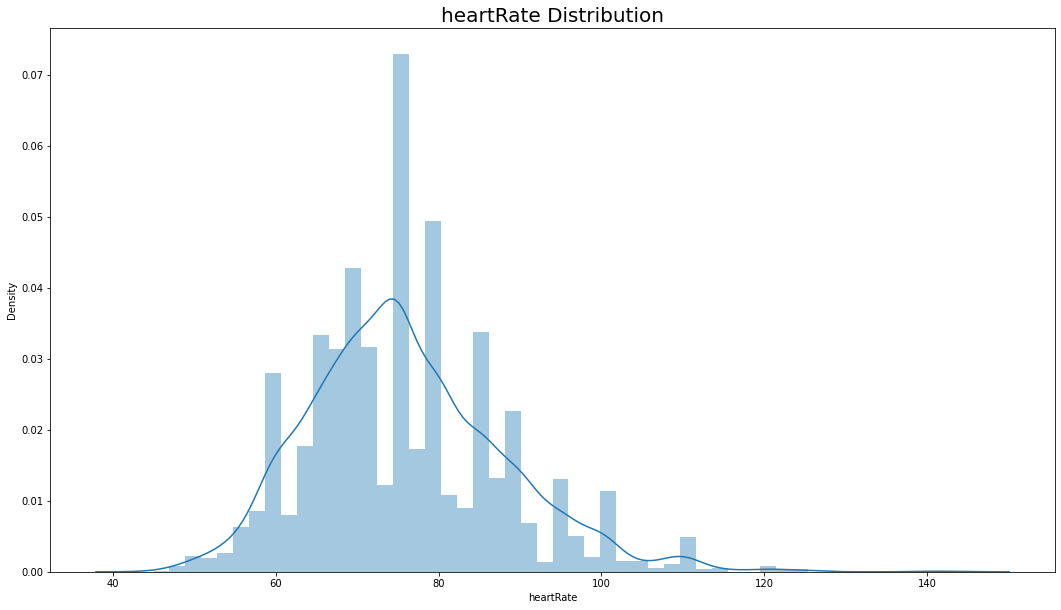

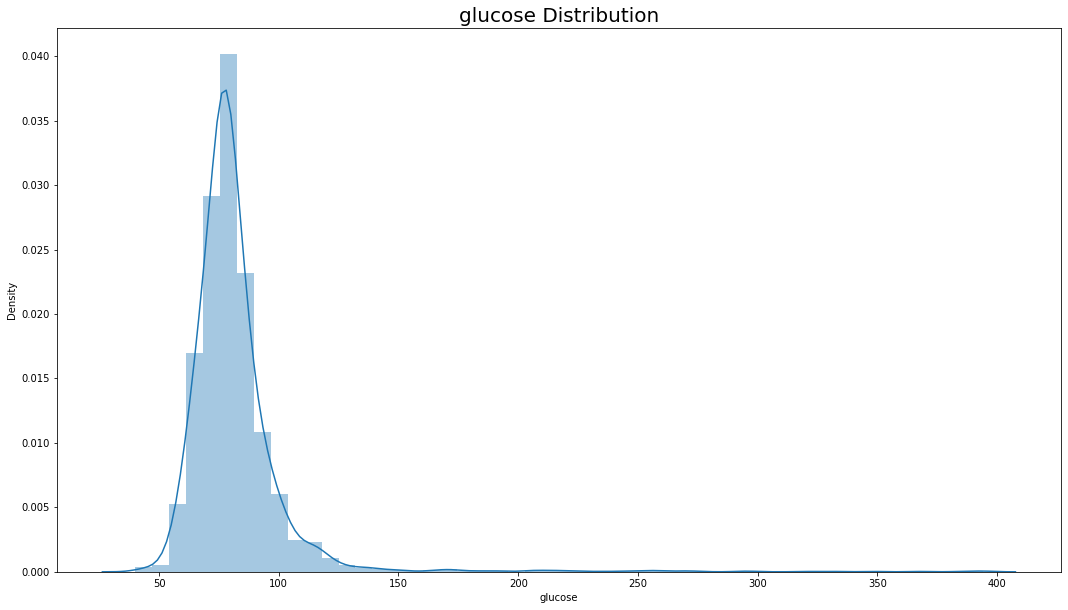

In [19]:

for feature in numerical_columns:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Glucose and totalChol are higly right skewed.

BMI, diaBP and sysBP are some what normally distributed.



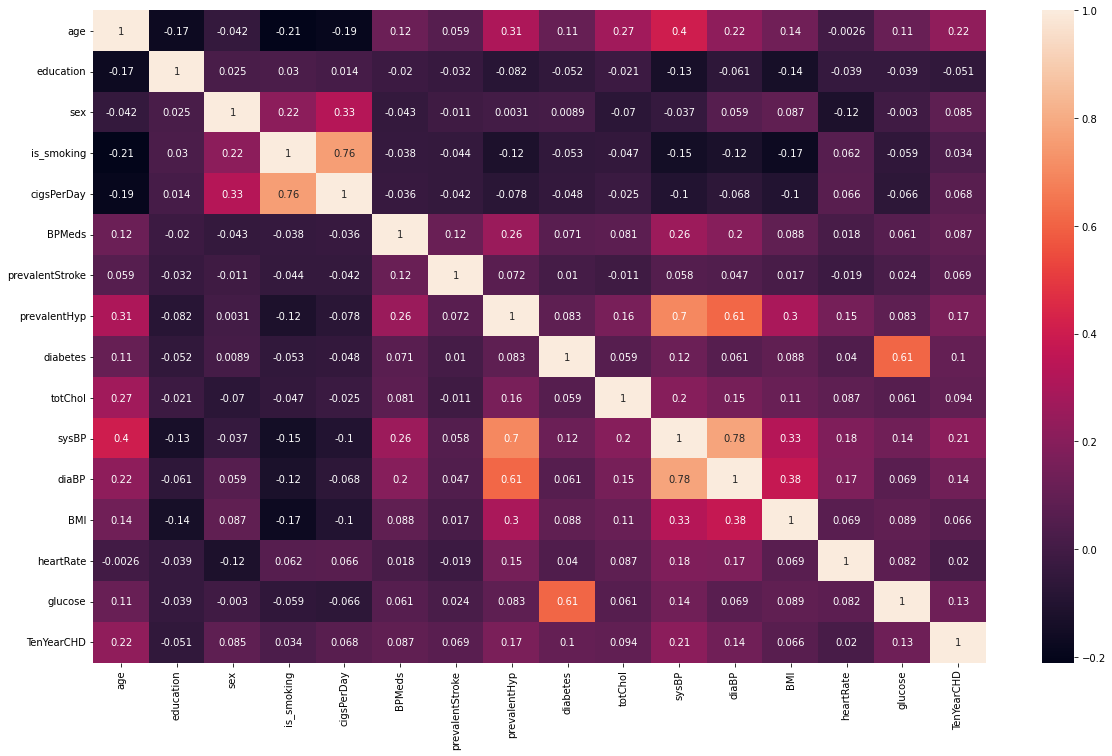

In [20]:
# lookings at the relationship of features with one another
plt.figure(figsize=(20,12))
sns.heatmap(data = df.corr(),annot= True)

sysBP and diaBP show the strongest positive correlation of 0.78 with each other.

is_smoking and cigsPerDay has positive correlation of 0.76.

Correlation of diabetes with glucose and prevalentHype with diaBP is equal i.e. positive correlation of 0.61.

Let us derive a new feature i.e. avgBP which would be defined by the below formula

avgBP = (sysBP + diaBP)/2

In [21]:
df["avgBP"]= round((df["sysBP"]+df["diaBP"])/2,2)

In [22]:
# Since avgBP has been added, we can now remove sysBP & diaBP
df.drop("sysBP",axis=1,inplace=True)
df.drop("diaBP",axis=1,inplace=True)

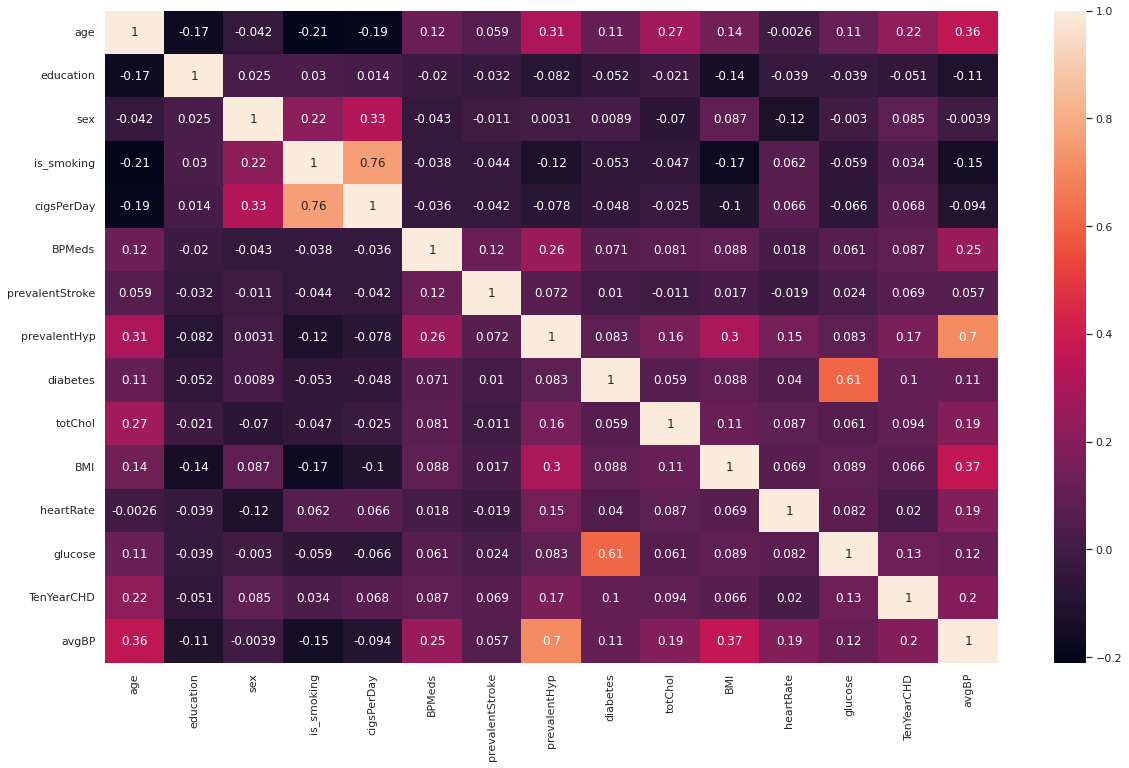

In [23]:
plt.figure(figsize=(20,12))
sns.set(font_scale = 1)
sns.heatmap(data = df.corr(),annot= True)

## EDA

In [24]:
#lets look at the target variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

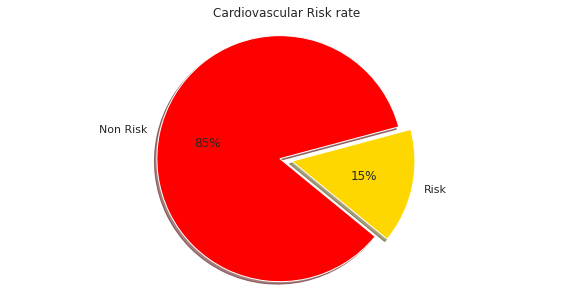

In [25]:
labels = 'Non Risk',"Risk"
my_colors = ['red','gold']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

**Count of people not suffering from CHD is 85% where count of people suffering from CHD is just 15%**

<Figure size 720x432 with 0 Axes>

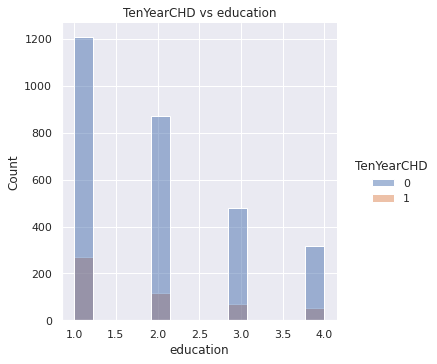

<Figure size 720x432 with 0 Axes>

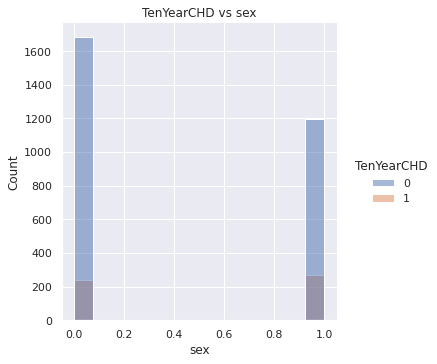

<Figure size 720x432 with 0 Axes>

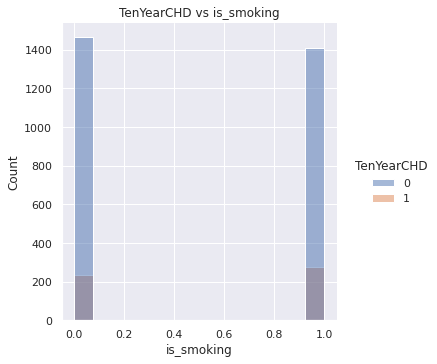

<Figure size 720x432 with 0 Axes>

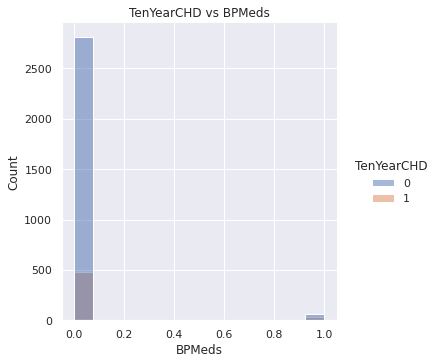

<Figure size 720x432 with 0 Axes>

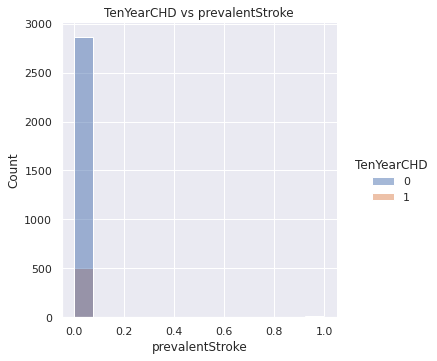

<Figure size 720x432 with 0 Axes>

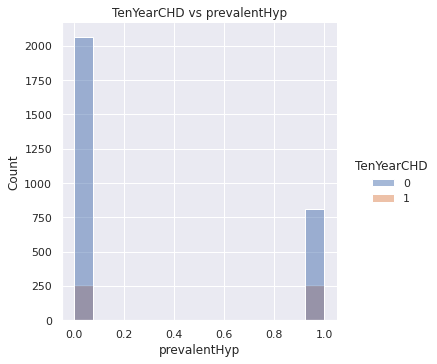

<Figure size 720x432 with 0 Axes>

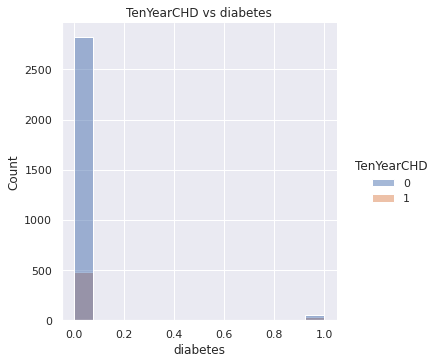

In [26]:
for a, b in enumerate(categorical_columns):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=b, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {b}')
  plt.show()



**The total count of people who are on BP meds, who had previously had a stroke and people who have diabetes is very less.**

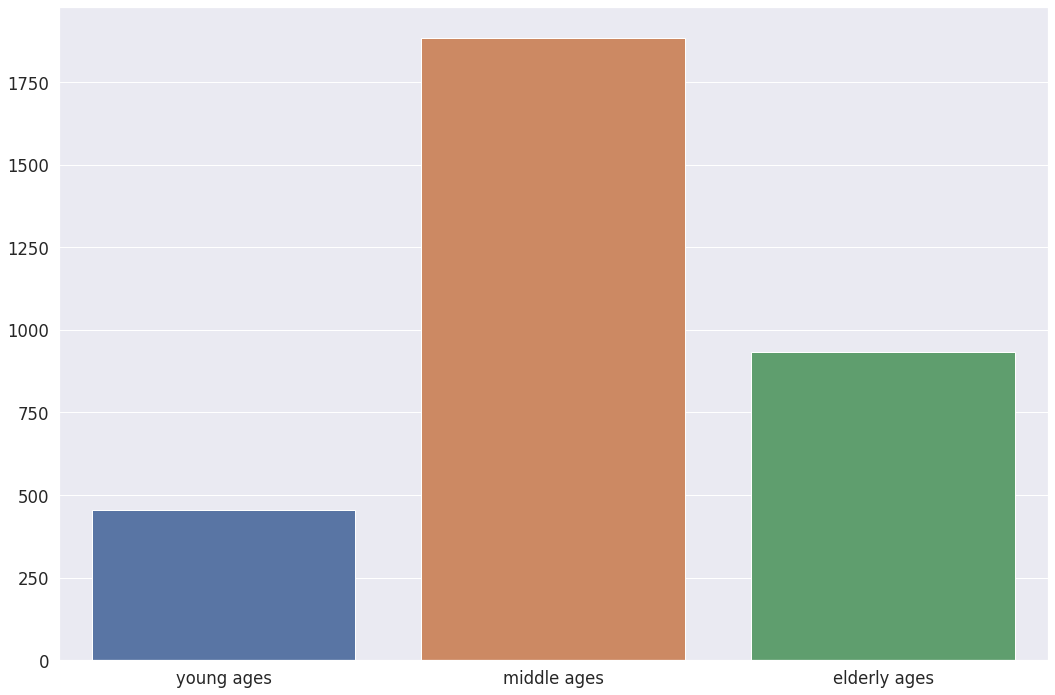

In [27]:
#dividing the age into three section
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(15,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**Count of Middle age person are highest followed by elderly person.**


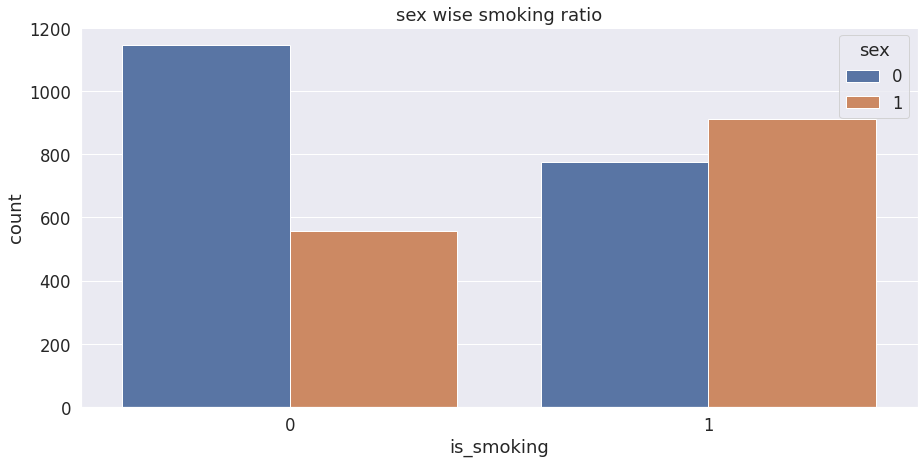

In [28]:
# number of male and female smokers
plt.figure(figsize=(15,7))
sns.countplot(x='is_smoking', hue = 'sex', data=df)
plt.title('sex wise smoking ratio')

plt.show()

Number of male smoker is higher than female smoker.

Number of non-smoker male is higher than female.This could be due to the fact that total count of male is higher than female in the given dataset.



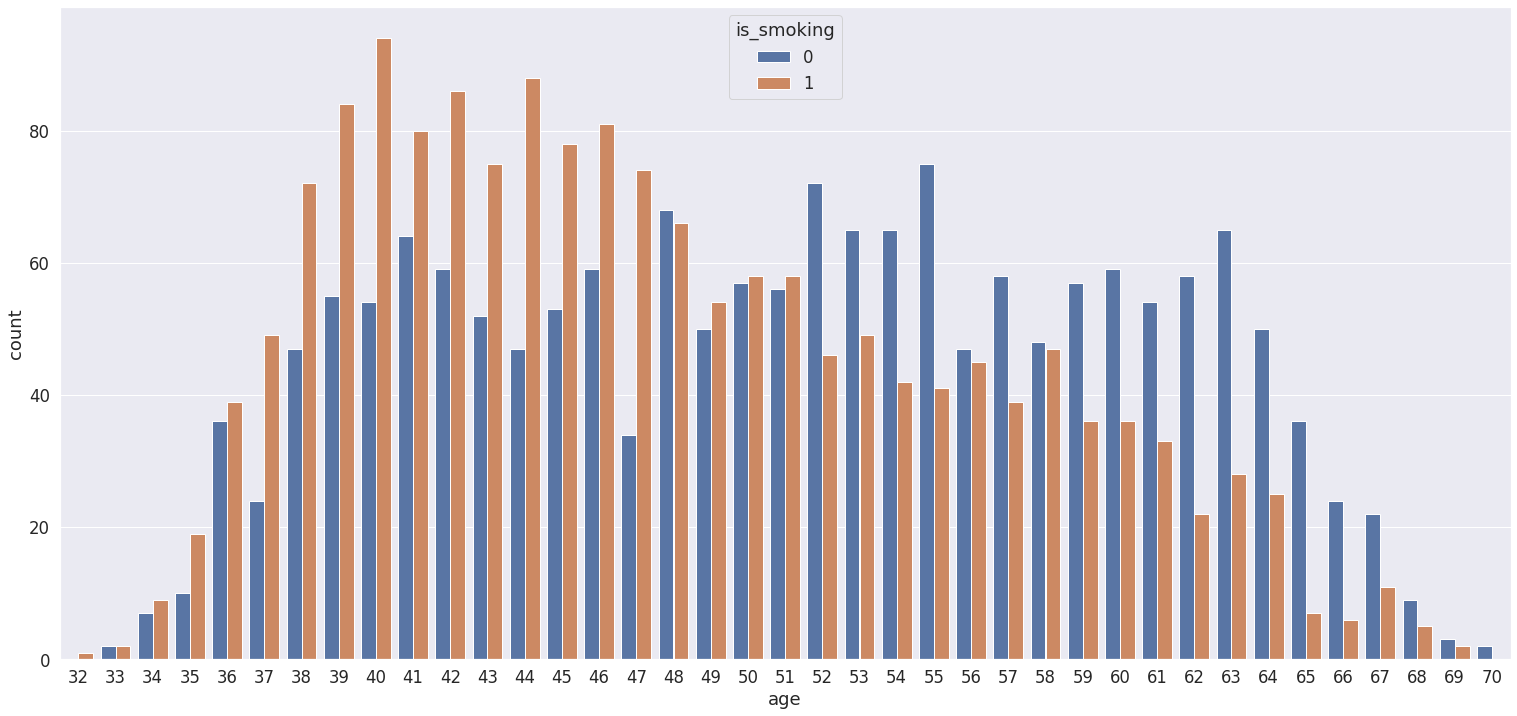

In [29]:
#age wise smoking ratio
plt.figure(figsize=(26,12), facecolor='w')
sns.countplot(x="age",data=df,hue="is_smoking")

**Number of smokers between the age group of 35 to 50 are highest i.e. Young and middle aged people smokes most.**

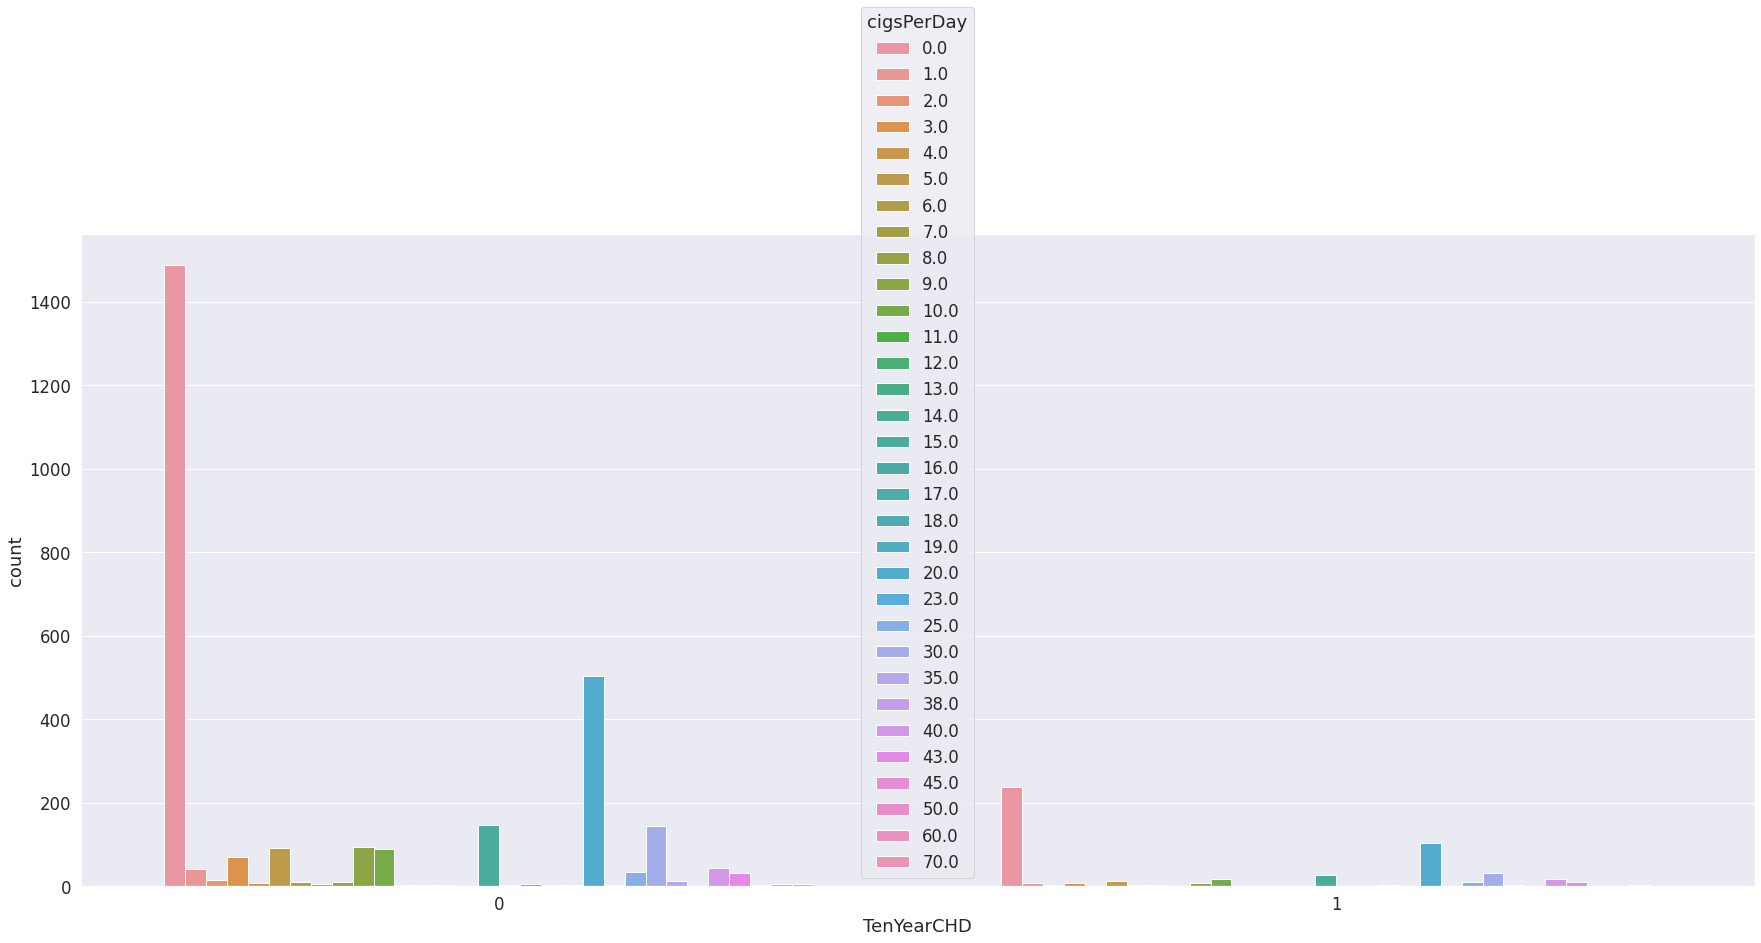

In [30]:
# checking the relationship between cigerperday and cardiovascular heart disease
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df,hue="cigsPerDay")

Number of peope who don't smoke is higher than the people who smoke.

In general people who don't smoke are less likely to suffer from heart disease than those who smokes.

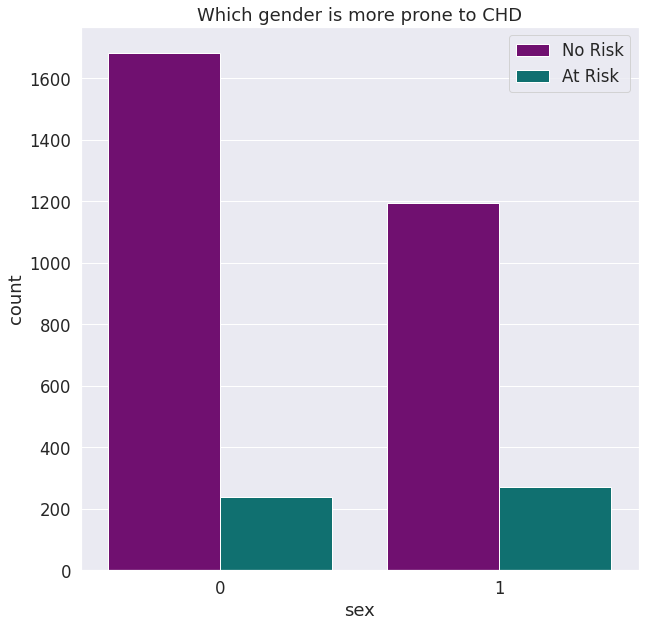

In [31]:
my_palette = {0 : 'purple' , 1 : 'teal'}

plt.figure(figsize = (10,10))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

**Both male and female are likely to get CHD. The number of females is higher than male in the given dataset this could be the reason that total number of female not at risk is higher than male.**

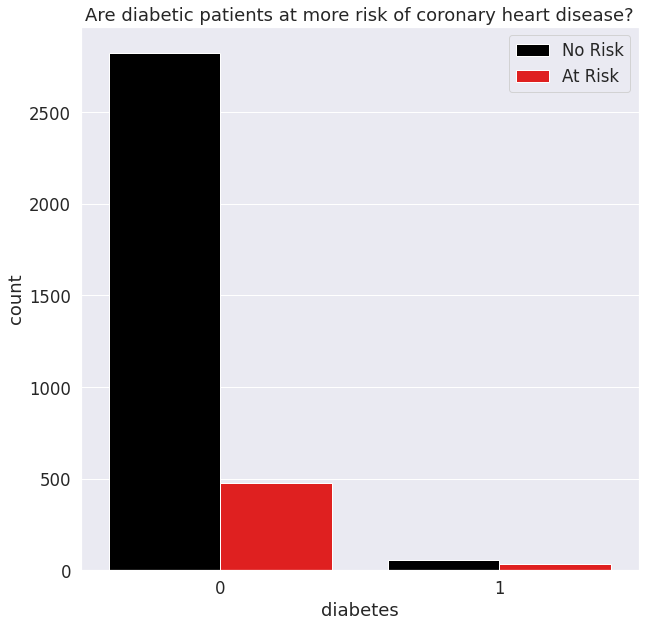

In [32]:
# diabetes and heart disease relation
my_palette = {0 : 'black' , 1 : 'red'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Diabetic patients are at more risk of CHD**

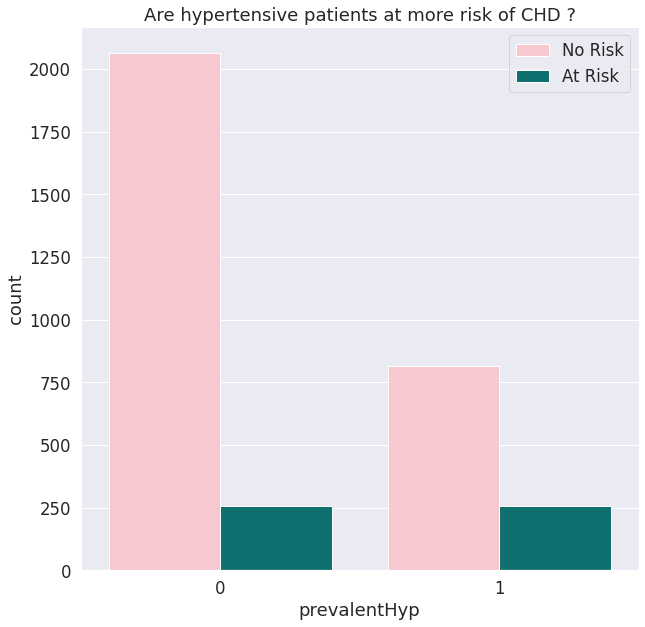

In [33]:
#relation between hypertensive patient and heart disease
plt.figure(figsize = (10,10))
my_palette = {0 : 'pink' , 1 : 'teal'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

Out of all the people who are not Hypertensive, the number of people getting CHD is very less.

People who are hypertensive has more chances of getting CHD. 


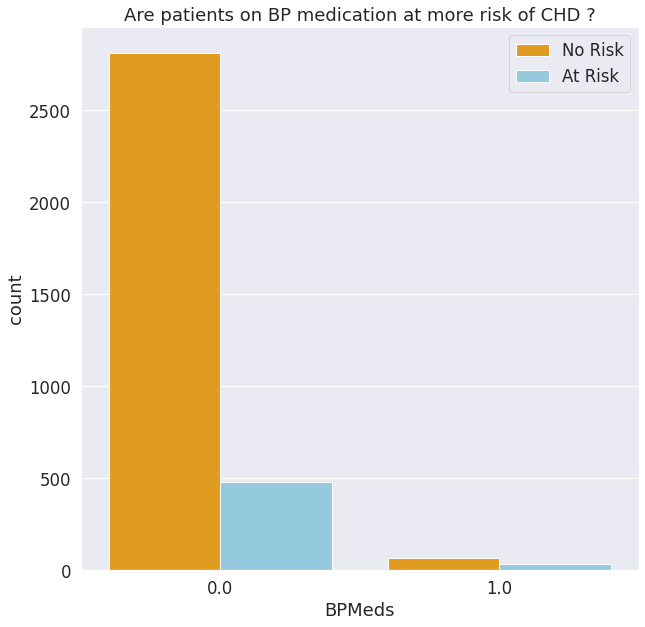

In [34]:
# relation between BP medication and heart disease
my_palette = {0 : 'orange' , 1 : 'skyblue'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Patients on BP medication are more prone to CHD where as those who are not on BP medication has severely less chances of getting CHD.**

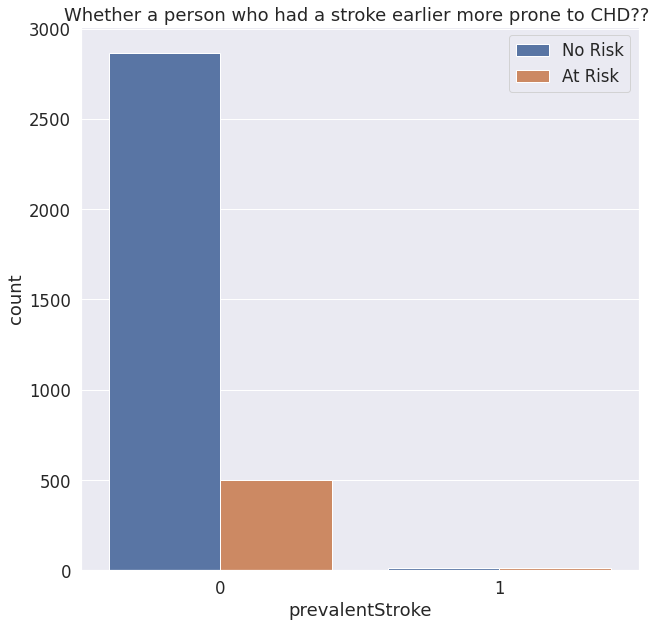

In [35]:
#relation between people who had stroke and heart disease
plt.figure(figsize = (10,10))
# my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'])
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

**The person who previously had a heart stroke are more at risk to CHD than those who did not.**

## Checking and Balancing the class imbalanced

In [36]:
new_df = df.copy()

In [37]:
# Let us now split
X = new_df.drop(['TenYearCHD'], axis=1)
y = new_df['TenYearCHD']

In [38]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape :', len(new_df))
print('Resampled dataset shape :', len(y_smote))

Original dataset shape : 3390
Resampled dataset shape : 5758


In [39]:
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [40]:
y_resampled.value_counts()

TenYearCHD
0             2879
1             2879
dtype: int64

## Standardizing the Dataset

In [41]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)

In [42]:
X = pd.DataFrame(X,columns= (new_df.drop(['TenYearCHD'], axis=1).columns))

# **Data Modeling**

## Logistic Regression

In [43]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split


In [44]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.3,stratify = y_resampled, random_state=0)

In [45]:
# create and train logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
logistic_regression_model.coef_

array([[ 0.59811422, -0.02447205, -0.30356369, -0.42088931,  0.79980168,
         0.12180377, -0.04183806, -0.37174332, -0.14453695,  0.03594085,
        -0.02500919, -0.0834546 ,  0.35183159,  0.58416318]])

In [47]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [48]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6724565756823822
The accuracy on test data is  0.65625


[[1355  660]
 [ 660 1355]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

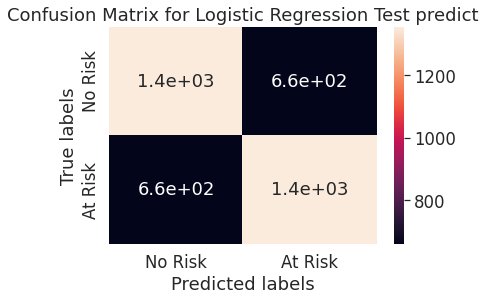

In [49]:
# Get the confusion matrix for train
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[580 284]
 [310 554]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

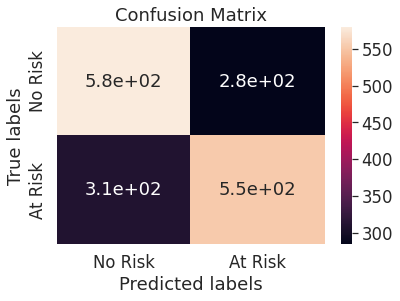

In [50]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [51]:
#Performance Metrics
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions= lr.predict(X_test)

lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test)
lr_recall= recall_score(lr_predictions,y_test)
lr_f1_score= f1_score(lr_predictions, y_test)

print('Performance of Logistic Regression Classifier')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier
Accuracy : 0.65625
Precision : 0.6412037037037037
Recall : 0.6610978520286396
F1 Score : 0.6509988249118684


<Figure size 1080x576 with 0 Axes>

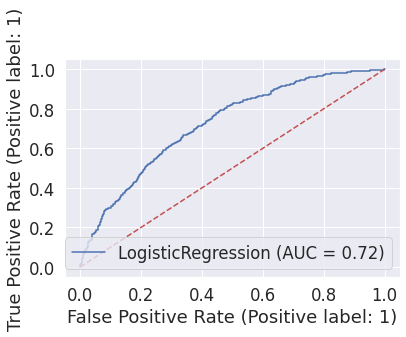

In [52]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## K-Nearest Neighbour

In [53]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predictions= knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)
knn_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN Classifier')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

Performance of KNN Classifier
Accuracy : 0.7482638888888888
Precision : 0.84375
Recall : 0.7084548104956269
F1 Score : 0.7702060221870048


<Figure size 1080x576 with 0 Axes>

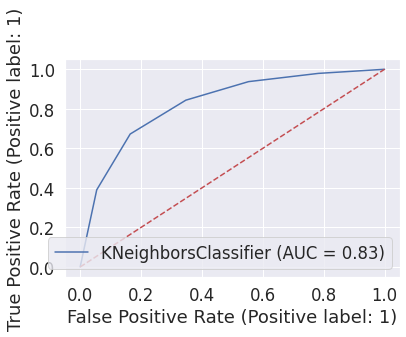

In [54]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## KNN (Hyper-parameter tuning)

In [55]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score = False,verbose=1)
  

grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [56]:
# The Best Parameters
print('Best Parameters:', grid_search_knn.best_estimator_.get_params())

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [57]:
knn_predictions= grid_search_knn.predict(X_test)

#Performance Metrics
knn1_accuracy= accuracy_score(knn_predictions,y_test)
knn1_precision= precision_score(knn_predictions,y_test)
knn1_recall= recall_score(knn_predictions,y_test)
knn1_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN with Hyperparameter Tuning')
print('Accuracy :' , knn1_accuracy)
print('Precision :', knn1_precision)
print('Recall :', knn1_recall)
print('F1 Score :', knn1_f1_score)

Performance of KNN with Hyperparameter Tuning
Accuracy : 0.8055555555555556
Precision : 0.8969907407407407
Recall : 0.7583170254403131
F1 Score : 0.8218451749734889


<Figure size 1080x576 with 0 Axes>

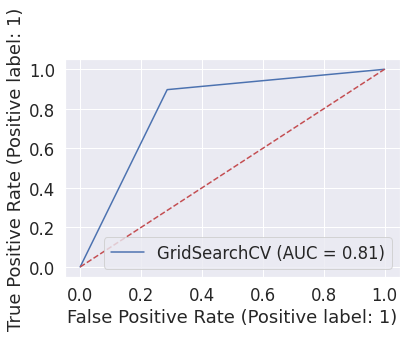

In [58]:
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Before hyperparameter tuning:**

AUC = 84%

Precision = 85%

Recall = 71%

F1 Score = 78%

-------------------------------
**After hyperparameter tuning:**

AUC = 81%

Precision = 89%

Recall = 77%

F1 Score = 83%

## Decision Tree

In [59]:
#importing library for decision tree classifier
from sklearn.tree import DecisionTreeClassifier



In [60]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

In [61]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [62]:
#checking Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) 
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) 
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 0.7592592592592593
the training accuracy is 0.7863523573200992


[[1820  195]
 [ 666 1349]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

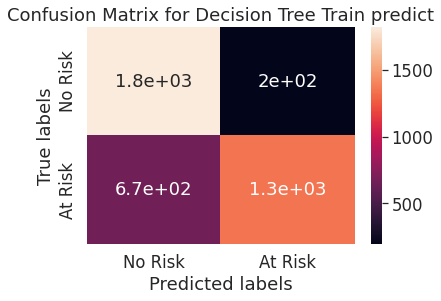

In [63]:
#confusion Matrix(train_data)
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[770  94]
 [322 542]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

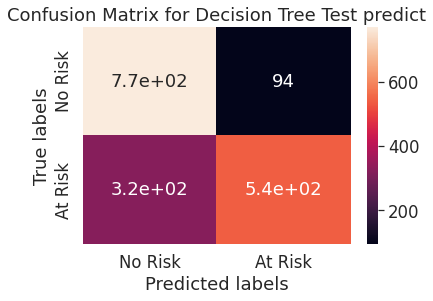

In [64]:
#confusion matrix(test_data)
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [65]:
decision_tree_model= DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)
decision_tree_model = decision_tree_model.predict(X_test)

#Performance Metrics
dt_accuracy= accuracy_score(y_test,test_preds)
dt_precision= precision_score(y_test,test_preds)
dt_recall= recall_score(y_test,test_preds)
dt_f1_score= f1_score( y_test,test_preds)

print('Performance of Decision tree Classifier')
print('Accuracy :' , dt_accuracy)
print('Precision :', dt_precision)
print('Recall :', dt_recall)
print('F1 Score :', dt_f1_score)

Performance of Decision tree Classifier
Accuracy : 0.7592592592592593
Precision : 0.8522012578616353
Recall : 0.6273148148148148
F1 Score : 0.7226666666666667


## Support Vector Machine

In [66]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train,y_train)
svm_predictions= svm.predict(X_test)

#Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test)
svm_precision= precision_score(svm_predictions,y_test)
svm_recall= recall_score(svm_predictions,y_test)
svm_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier')
print('Accuracy :' , svm_accuracy)
print('Precision :', svm_precision)
print('Recall :', svm_recall)
print('F1 Score :', svm_f1_score)

Performance of Support Vector Machine Classifier
Accuracy : 0.7094907407407407
Precision : 0.7256944444444444
Recall : 0.702914798206278
F1 Score : 0.7141230068337129


<Figure size 1080x576 with 0 Axes>

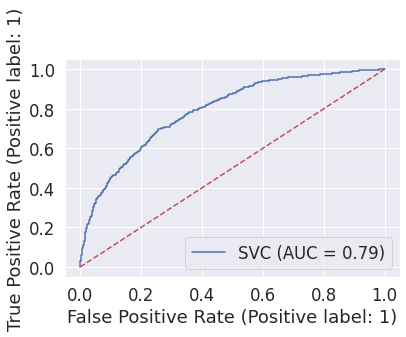

In [67]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## SVM (Hyper-parameter tuning)

In [82]:
kernel = ['rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_svm.fit(X_train, y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


In [83]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.789786 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [84]:
svm_predictions= grid_search_svm.predict(X_test)

# #Performance Metrics
svm1_accuracy= accuracy_score(svm_predictions,y_test)
svm1_precision= precision_score(svm_predictions,y_test)
svm1_recall= recall_score(svm_predictions,y_test) 
svm1_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier after hyperparameter tuning')
print('Accuracy :' , svm1_accuracy)
print('Precision :', svm1_precision)
print('Recall :', svm1_recall)
print('F1 Score :', svm1_f1_score)

Performance of Support Vector Machine Classifier after hyperparameter tuning
Accuracy : 0.7800925925925926
Precision : 0.8148148148148148
Recall : 0.7619047619047619
F1 Score : 0.7874720357941833


<Figure size 1080x576 with 0 Axes>

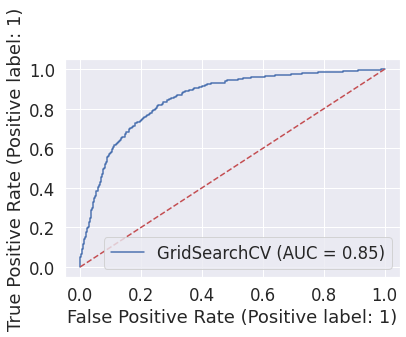

In [85]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')

In [87]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [88]:
#predicting on train and test set
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [89]:
#checking score on train set
accuracy_score(y_train,train_preds)

0.9977667493796526

In [90]:
#checking score on test set
accuracy_score(y_test,test_preds)

0.8796296296296297

In [91]:
# area under cure for test prediction
roc_auc_score(y_test,test_preds)

0.8796296296296297

In [92]:
# area under curve for train prediction
roc_auc_score(y_train,train_preds)

0.9977667493796526

In [93]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
classifier = classifier.predict(X_test)

#Performance Metrics
rf_accuracy= accuracy_score(y_test,test_preds)
rf_precision= precision_score(y_test,test_preds)
rf_recall= recall_score(y_test,test_preds)
rf_f1_score= f1_score( y_test,test_preds)

print('Performance of Randomforest Classifier')
print('Accuracy :' , rf_accuracy)
print('Precision :', rf_precision)
print('Recall :', rf_recall)
print('F1 Score :', rf_f1_score)

Performance of Randomforest Classifier
Accuracy : 0.8796296296296297
Precision : 0.8822843822843823
Recall : 0.8761574074074074
F1 Score : 0.8792102206736354


Performance imporved after hyperparameter tuning

In [94]:
# comparing the performances of all the classifiers

models = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector Machines','SVM with hyperparameter tuning', 'K Nearest Neighbour', 'KNN with hyperparameter tuning', 'Logistic Regression','Random Forest'],
    'Accuracy': [dt_accuracy, svm_accuracy, svm1_accuracy, knn_accuracy, knn1_accuracy, lr_accuracy, rf_accuracy],
    'Precision': [dt_precision, svm_precision, svm1_precision, knn_precision, knn1_precision, lr_precision, rf_precision ],
    'Recall': [dt_recall, svm_recall, svm1_recall, knn_recall, knn1_recall, lr_recall,rf_recall],
    'F1 Score': [dt_f1_score, svm_f1_score, svm1_f1_score, knn_f1_score, knn1_f1_score, lr_f1_score,rf_f1_score]})


In [95]:
models.head(10)

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.759259,0.852201,0.627315,0.722667
1,Support Vector Machines,0.709491,0.725694,0.702915,0.714123
2,SVM with hyperparameter tuning,0.780093,0.814815,0.761905,0.787472
3,K Nearest Neighbour,0.748264,0.843750,0.708455,0.770206
4,KNN with hyperparameter tuning,0.805556,0.896991,0.758317,0.821845
5,Logistic Regression,0.656250,0.641204,0.661098,0.650999
6,Random Forest,0.879630,0.882284,0.876157,0.879210


Logistic regression perfromed the worst.

Random forest performed best with highest F1 score of 0.87 follwed by KNN with hyperparameter tuning with F1 score of 0.82

## Conclusion

We concluded the following points

1. Males and females have the same chances of getting CHD.

2. Young people are least likely to suffer from heart disease.

3. Risk of getting CHD increases with age. Hence middle and older age people are more prone to heart disease.

4. People who smokes have higher chances of CHD then those who dont smoke.

5. People who are on BP medication, who previously had a stroke, who are hypertensive and people who have diabetes have higher chances of getting CHD.

## **THANK YOU!**